# Import et initialisation du dataframe

In [138]:
from models_lille_europe import engine
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore")

In [139]:
df = pd.read_sql_table('LostObject', con=engine)
df = df[df.date.dt.year < 2023]
df['count'] = 1 
df

,id,date,type,nature,count
0,6640346dbbbe657a01b1f386ac17c97a8829ee94,2016-12-31 17:49:05,"Porte-monnaie / portefeuille, argent, titres",Chéquier,1
1,a53cfdf26f1b703a7eb2368bee407341658254e1,2016-12-31 16:09:12,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",1
2,7313609b38006d33377b8e8cdadac43170598df5,2016-12-31 15:52:03,Pièces d'identités et papiers personnels,Carte Vitale,1
3,e196e37b436ef22c65b0f1a12087afafdc3b8eae,2016-12-31 13:55:43,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",1
4,fef038fccbd61ecfe30d0f543739dcf77b72f2b7,2016-12-31 13:41:39,"Bagagerie: sacs, valises, cartables",Sac à main,1
...,...,...,...,...,...
22195,bbab85e627b8d4aeca4d1720cd4b5930cce5db7f,2022-01-01 07:52:47,"Bagagerie: sacs, valises, cartables",Sac à main,1
22196,ff9b63796f3887d0ec5d1424cfd87a5ad9dedd13,2022-01-01 07:24:45,"Appareils électroniques, informatiques, appare...","Ordinateur, ordinateur portable, notebook prot...",1
22197,43a5ed696cfd980a92b26224660a2ed97f0cd446,2022-01-01 07:11:13,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",1
22198,4765486d2525d7d4f4f12266643c3c2c4aba1a6a,2022-01-01 07:03:34,"Appareils électroniques, informatiques, appare...",Téléphone portable,1


# La moyenne d'objet perdu par mois

In [312]:
df_mean_month = df.groupby(df.date.dt.month).sum() / 7
df_mean_month

,count
date,
1,261.857143
2,248.571429
3,241.428571
4,220.428571
5,243.000000
6,284.571429
7,303.000000
8,267.142857
9,301.857143


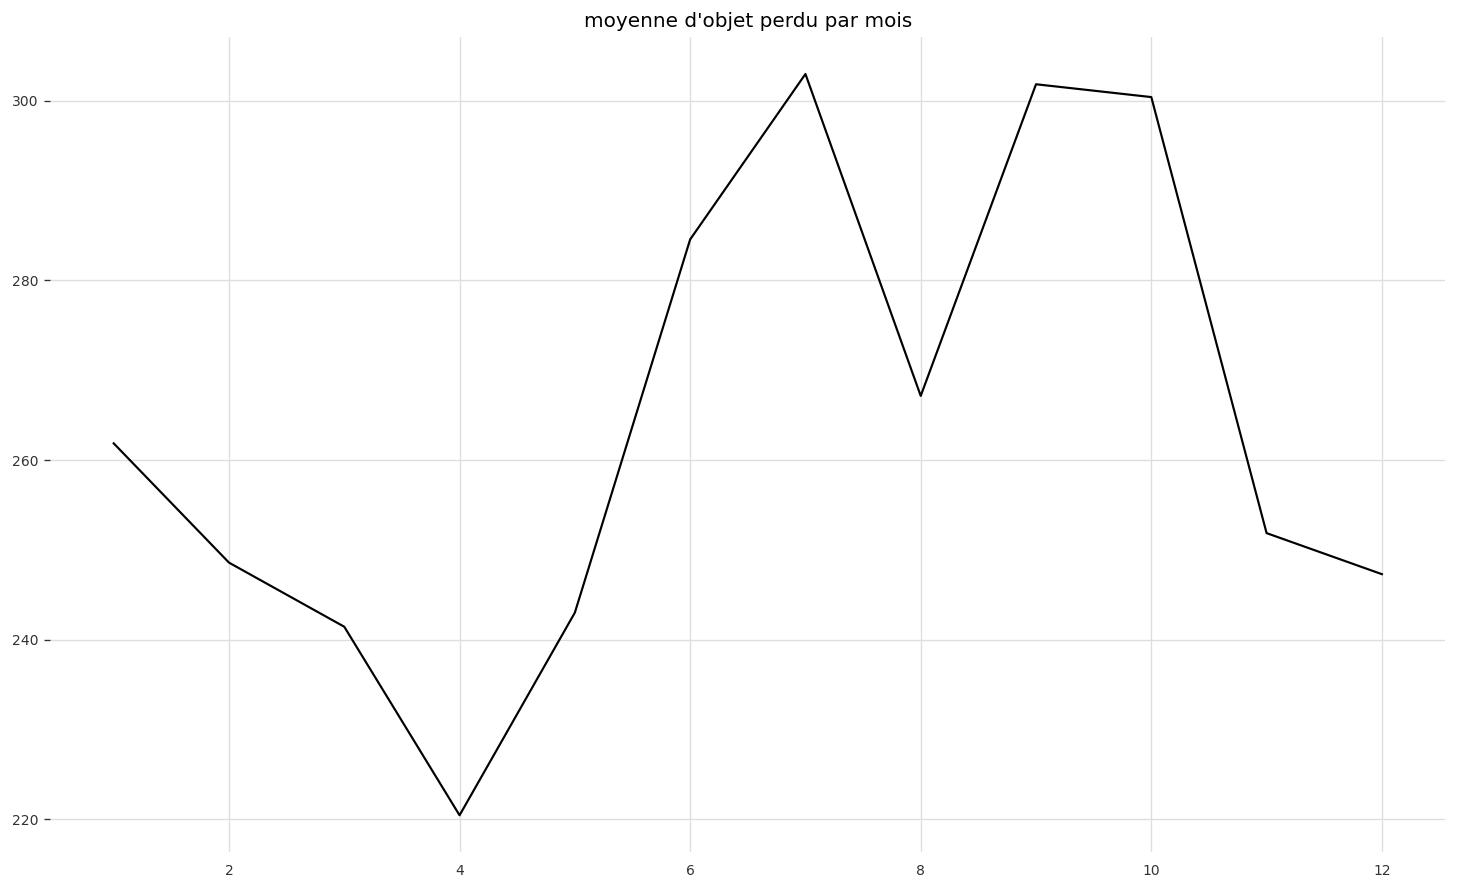

In [313]:
plt.figure(figsize=(15, 9))
plt.plot(df_mean_month)
plt.title("moyenne d'objet perdu par mois")
plt.show()

# La moyenne d'objet perdu par semaine

In [314]:
df_mean_week = df.groupby(df.date.dt.week).sum() / 7 # Somme de chaque semaine divisé par les 7ans. 
df_mean_week

,count
date,
1,58.428571
2,57.857143
3,58.857143
4,58.857143
5,63.571429
6,62.428571
7,61.857143
8,61.857143
9,57.142857


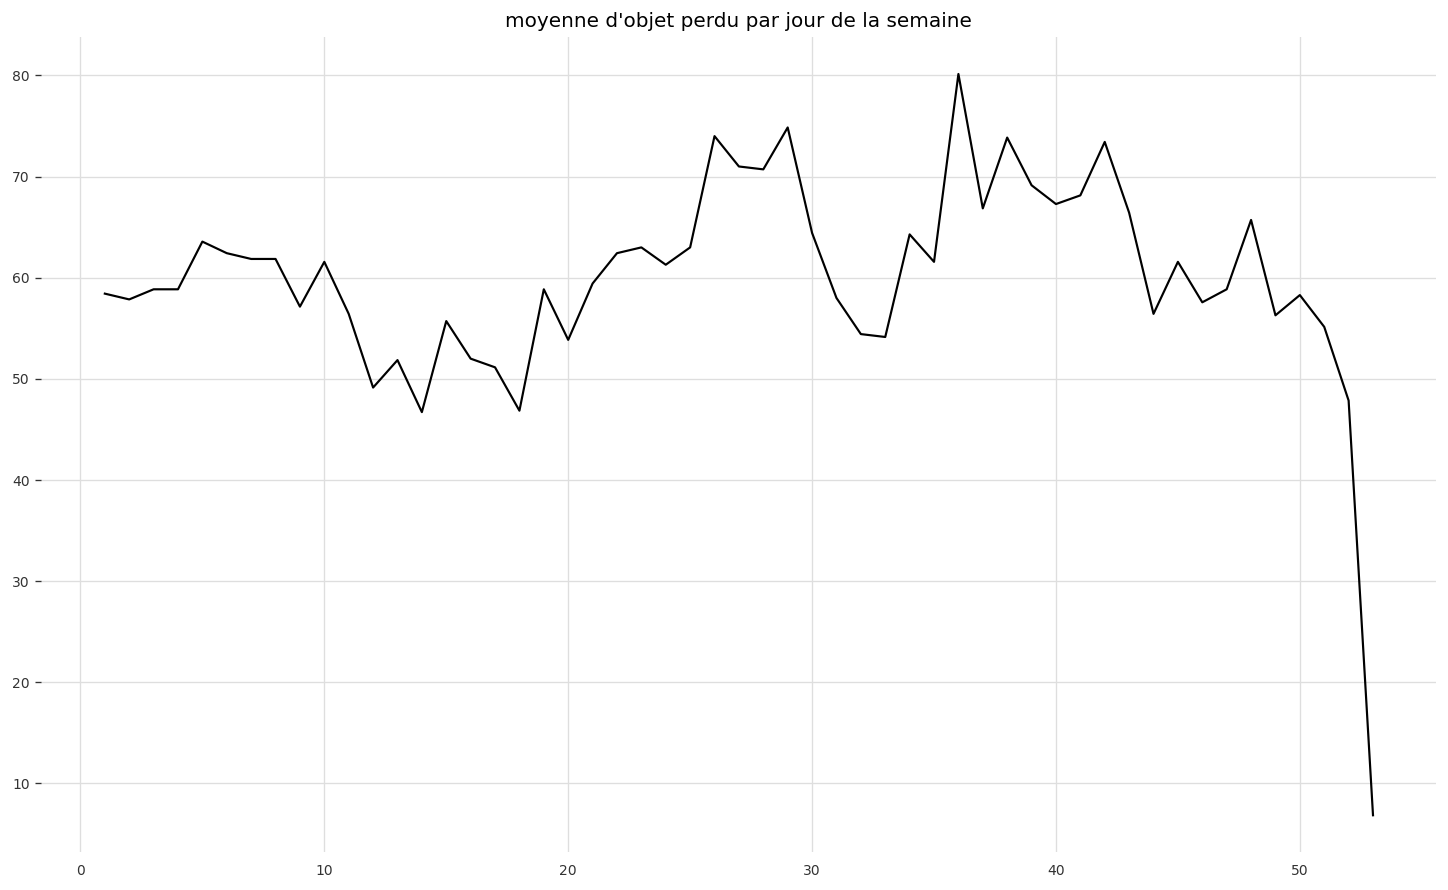

In [315]:
plt.figure(figsize=(15, 9))
plt.plot(df_mean_week)
plt.title("moyenne d'objet perdu par jour de la semaine")
plt.show()

# Affichez la moyenne d'objet perdu par jour de la semaine

In [316]:
df_mean_dayofweek = df.groupby(df.date.dt.dayofweek).sum() / (7 *53) # Somme de chaque jour de la semaine divisé par 53 semaines sur 7ans. 
df_mean_dayofweek

,count
date,
0,10.814016
1,8.431267
2,7.849057
3,9.053908
4,8.595687
5,8.342318
6,6.752022


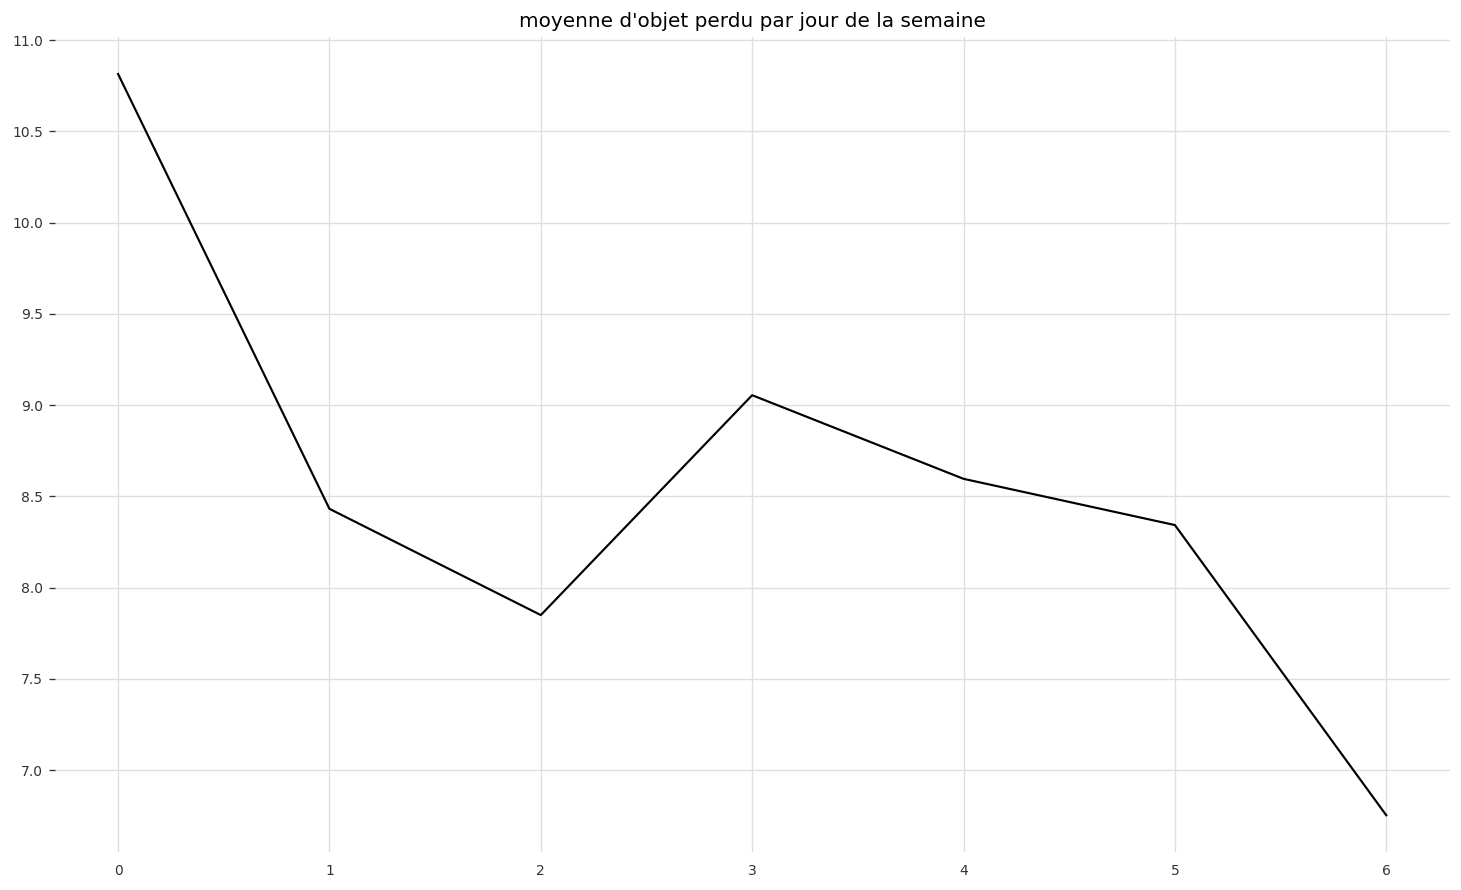

In [317]:
plt.figure(figsize=(15, 9))
plt.plot(df_mean_dayofweek)
plt.title("moyenne d'objet perdu par jour de la semaine")
plt.show()

# Affichez la moyenne d'objet perdu par jour de l'année

In [68]:
# Affichez entre 2016 et 2022 la somme des objets perdus par jour 
df_sum_dayofyear = df.groupby(df.date.dt.dayofyear).sum() / 7 
df_sum_dayofyear['mean'] = df_sum_dayofyear['count'].mean()
df_sum_dayofyear

,count,mean
date,,
1,5.714286,8.665105
2,9.428571,8.665105
3,12.142857,8.665105
4,10.142857,8.665105
5,6.142857,8.665105
...,...,...
362,5.571429,8.665105
363,7.857143,8.665105
364,8.571429,8.665105


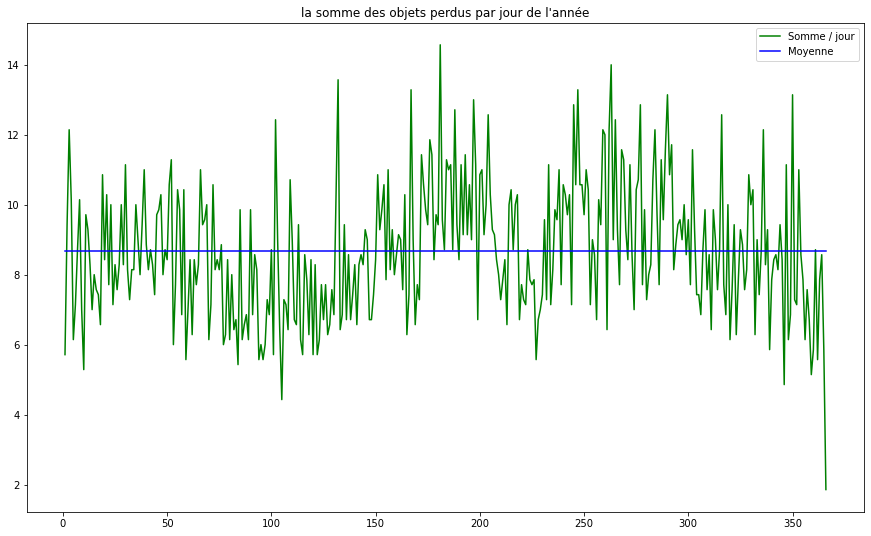

In [71]:
plt.figure(figsize=(15, 9))
plt.plot(df_sum_dayofyear['count'], color='green')
plt.plot(df_sum_dayofyear['mean'], color='blue')
plt.legend(['Somme / jour', 'Moyenne'])
plt.title("la somme des objets perdus par jour de l'année")
plt.show()

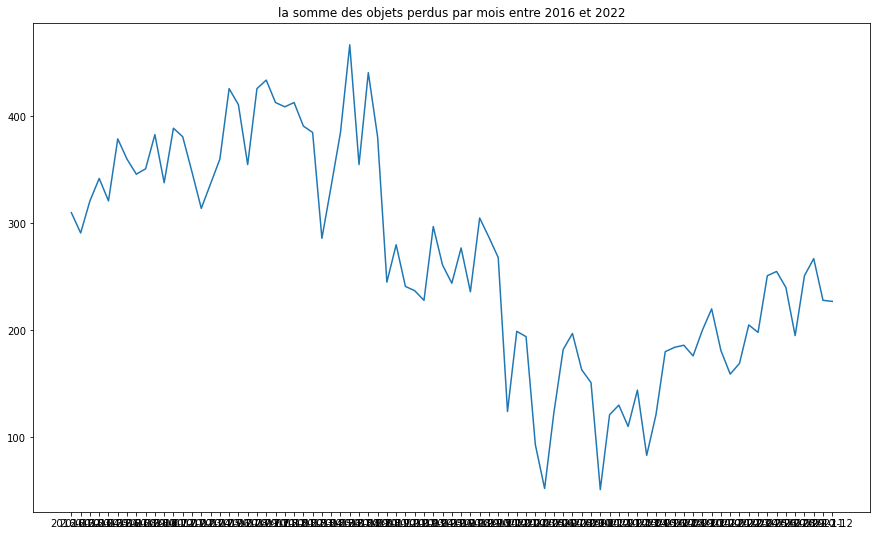

In [23]:
df_year_month = df.groupby(df.date.dt.strftime('%Y-%m')).sum()
plt.figure(figsize=(15, 9))
plt.plot(df_year_month)
plt.title("la somme des objets perdus par mois entre 2016 et 2022")
plt.show()

# Affichez la somme d'objet perdu par année  

In [140]:
# Affichez entre 2016 et 2022 la somme des objets perdus par année
df_sum_year = df.groupby(df.date.dt.year).sum() 
df_sum_year['mean'] = df_sum_year['count'].mean()
df_sum_year

,count,mean
date,,
2016,4131,3171.428571
2017,4614,3171.428571
2018,4364,3171.428571
2019,3005,3171.428571
2020,1526,3171.428571
2021,1915,3171.428571
2022,2645,3171.428571


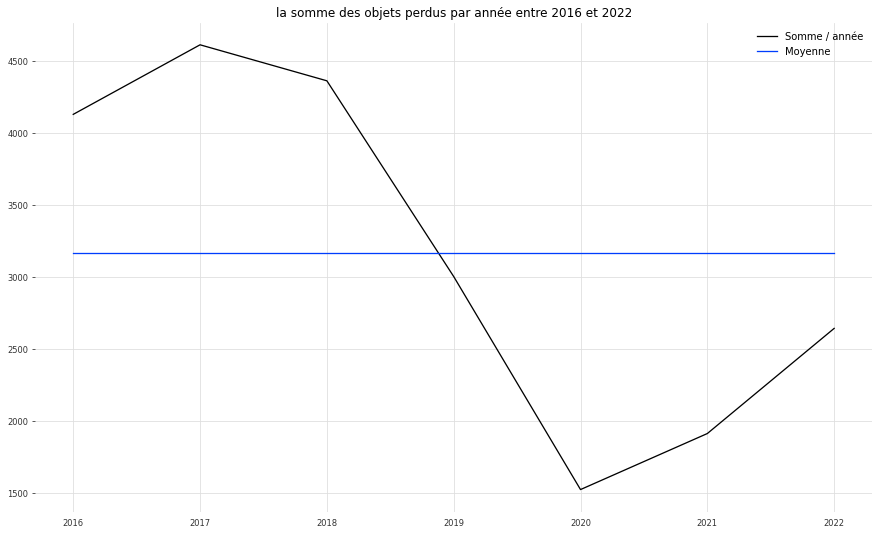

In [148]:
plt.figure(figsize=(15, 9))
plt.plot(df_sum_year)
plt.legend(['Somme / année', 'Moyenne'])
plt.title("la somme des objets perdus par année entre 2016 et 2022")
plt.show()

# Représentez entre 2016 et 2022, chacun des mois de cette période à l'aide d'un boxplot.

In [359]:
# for year in range(2016, 2023):
#     for month in range(1,12):
#         plt.figure(figsize=(9, 6))
#         (df[(df.date >= f'{year}-{month}-01') & (df.date <= f'{year}-{month + 1}-02')].groupby(df.date.dt.strftime('%Y-%m')).sum()).boxplot()
#         plt.title(f'boxplot for year {year} and month {month}')
#         plt.show()

# Merge all in one datafram

In [72]:
df_sum_dayofyear = df.groupby(df.date.dt.dayofyear).sum()['count']
df_sum_dayofyear = df_sum_dayofyear.reset_index().rename(columns={"count":'count/dayofyear', 'date':'dayofyear'})

df_sum_dayofweek = df.groupby(df.date.dt.dayofweek).sum()['count']
df_sum_dayofweek = df_sum_dayofweek.reset_index().rename(columns={"count":'count/dayofweek', 'date':'dayofweek'})

df_sum_month = df.groupby(df.date.dt.month).sum()['count']
df_sum_month = df_sum_month.reset_index().rename(columns={"count":'count/month', 'date':'month'})

df_sum_year = df.groupby(df.date.dt.year).sum()['count']
df_sum_year = df_sum_year.reset_index().rename(columns={"count":'count/year', 'date':'year'})

In [90]:
df['dayofyear'] = df.date.dt.dayofyear.astype('int32')
df['dayofweek'] = df.date.dt.dayofweek
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df_all = (df
      .merge(df_sum_dayofyear, on='dayofyear', how='inner')
      .merge(df_sum_dayofweek, on='dayofweek', how='inner')
      .merge(df_sum_month, on='month', how='inner')
      .merge(df_sum_year, on='year', how='inner'))

df_all

,id,date,type,nature,count,dayofyear,dayofweek,year,month,count/dayofyear,count/dayofweek,count/month,count/year
0,6640346dbbbe657a01b1f386ac17c97a8829ee94,2016-12-31 17:49:05,"Porte-monnaie / portefeuille, argent, titres",Chéquier,1,366,5,2016,12,13,3095,1731,4131
1,a53cfdf26f1b703a7eb2368bee407341658254e1,2016-12-31 16:09:12,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",1,366,5,2016,12,13,3095,1731,4131
2,7313609b38006d33377b8e8cdadac43170598df5,2016-12-31 15:52:03,Pièces d'identités et papiers personnels,Carte Vitale,1,366,5,2016,12,13,3095,1731,4131
3,e196e37b436ef22c65b0f1a12087afafdc3b8eae,2016-12-31 13:55:43,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",1,366,5,2016,12,13,3095,1731,4131
4,fef038fccbd61ecfe30d0f543739dcf77b72f2b7,2016-12-31 13:41:39,"Bagagerie: sacs, valises, cartables",Sac à main,1,366,5,2016,12,13,3095,1731,4131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,a69fe835873f356af0cba3177efb3841462e8e17,2021-01-05 13:25:12,"Bagagerie: sacs, valises, cartables",Sac à dos,1,5,1,2021,1,43,3128,1833,1915
22196,28237516b556360f284e60d12309bc908085a55f,2021-01-05 12:36:14,"Bagagerie: sacs, valises, cartables",Sac à dos,1,5,1,2021,1,43,3128,1833,1915
22197,732ff3767572125aa098cc7e52c3000576002e4c,2021-01-05 12:23:17,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",1,5,1,2021,1,43,3128,1833,1915
22198,48d09203a948691426946fa6ed67a290c8059334,2021-01-05 07:22:15,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",1,5,1,2021,1,43,3128,1833,1915


# -- PMDARIMA

## AUTO_ARIMA 

In [329]:
df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count']

date
2016-01    310
2016-02    291
2016-03    321
2016-04    342
2016-05    321
          ... 
2022-08    195
2022-09    251
2022-10    267
2022-11    228
2022-12    227
Name: count, Length: 83, dtype: int64

In [330]:
model_year_month = pm.auto_arima(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model_year_month.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=869.146, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.320, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=872.733, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=869.761, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=873.355, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=870.988, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=870.969, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=869.077, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=870.971, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=872.883, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=867.244, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=867.847, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=869.159, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=869.158, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=867.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -430.622
Date:                Sun, 08 Jan 2023   AIC                            867.244
Time:                        17:48:23   BIC                            874.464
Sample:                             0   HQIC                           870.143
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3273      0.118     -2.782      0.005      -0.558      -0.097
ma.L2         -0.1788      0.102     -1.752      0.080      -0.379       0.021
sigma2      2126.3532    272.752      7.796      0.000    1591.768    2660.938
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.63
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.82
Prob(H) (two-sided):                  0.93   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

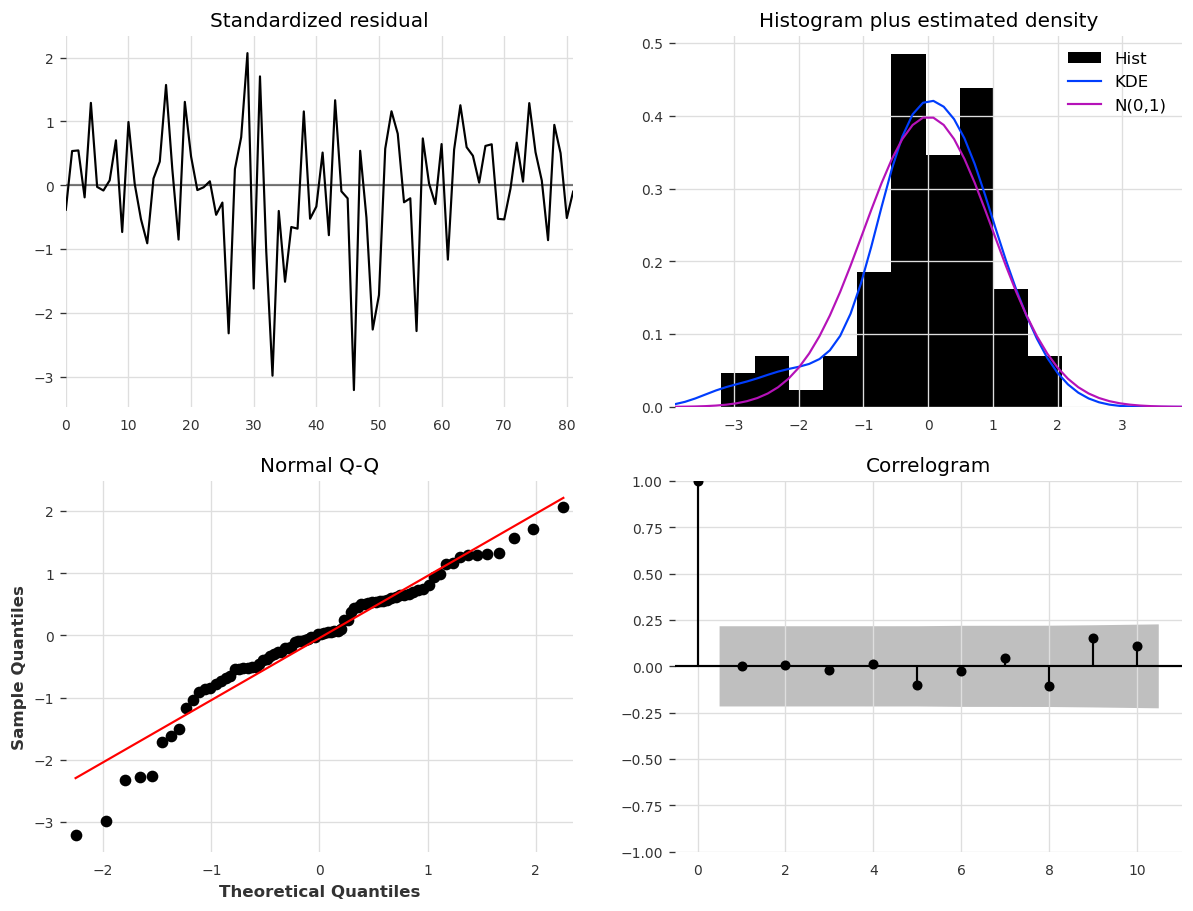

In [331]:
model_year_month.plot_diagnostics(figsize=(12,9))
plt.show()

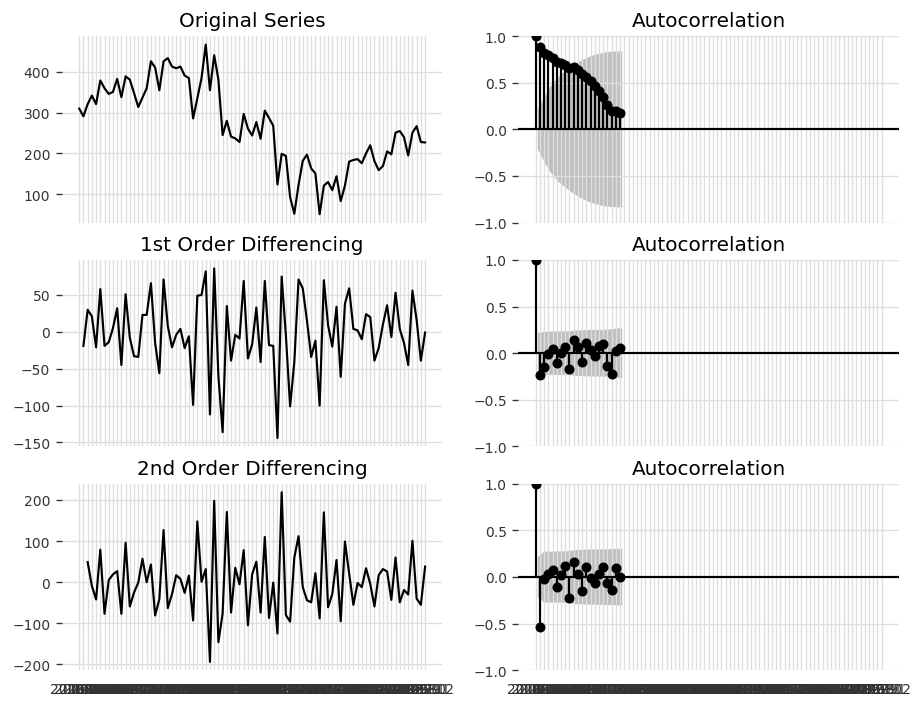

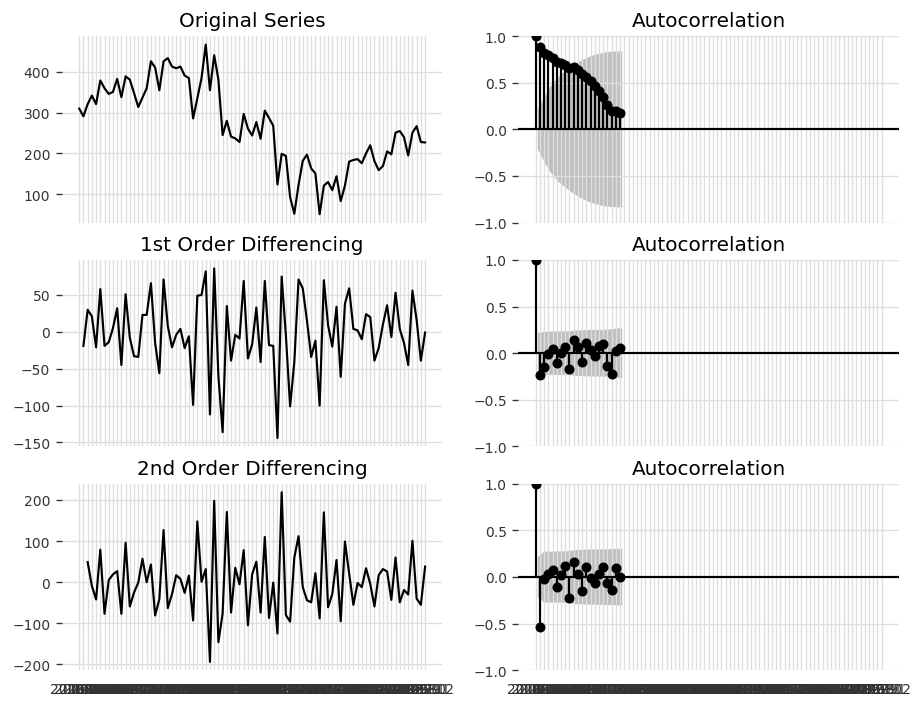

In [332]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count']); axes[0, 0].set_title('Original Series')
plot_acf(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.groupby(df.date.dt.strftime('%Y-%m')).sum()['count'].diff().diff().dropna(), ax=axes[2, 1])

## ARIMA 

In [333]:
df_year_month = df.groupby(df.date.dt.strftime('%Y-%m')).sum().reset_index()
df_year_month['covid'] = False
df_year_month['covid'][(df_year_month.date > '2020-02') & (df_year_month.date < '2020-06') ] = True
df_year_month = df_year_month[['date','count','covid']]

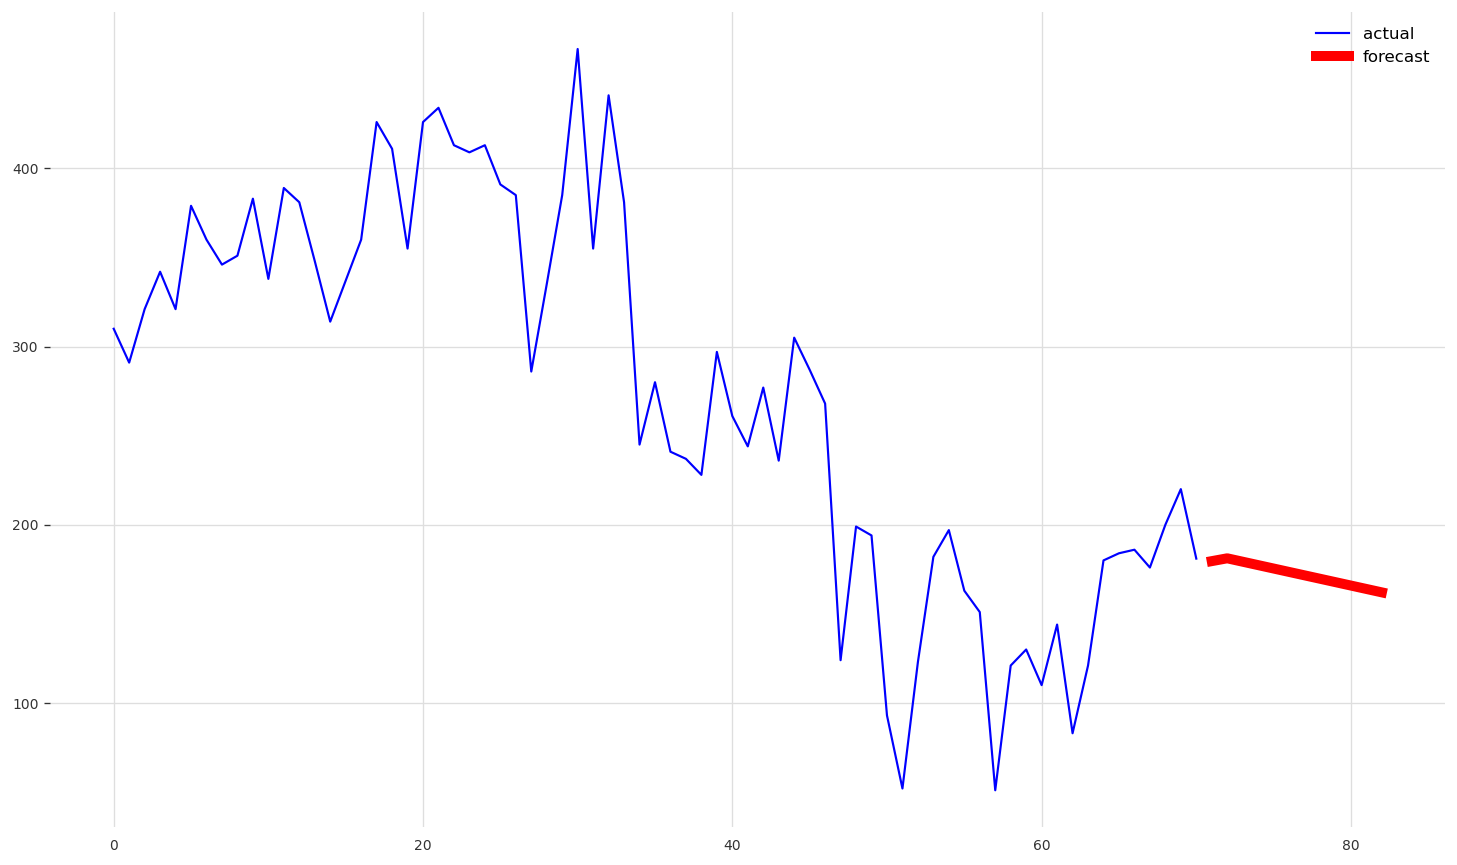

In [335]:
import pmdarima as pm

train, val = df_year_month[:71]['count'], df_year_month[71:]['count']

model_arima = pm.arima.ARIMA(order=(0,1,2))

model_arima_fit = model_arima.fit(train)

prediction_arima = model_arima_fit.predict(len(val))

plt.figure(figsize=(15, 9))
train.plot(label='actual', color='blue')
prediction_arima.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()

# -- DARTS

## import and init datafram year_month

In [94]:
from darts import TimeSeries
from darts.models import AutoARIMA
from darts.models import ExponentialSmoothing
from darts.models.forecasting.linear_regression_model import LinearRegressionModel
from darts.models.forecasting.tft_model import TFTModel
from darts.models.forecasting.xgboost import XGBModel
from darts.metrics.metrics import mse, marre, mae, dtw_metric, mape
from darts.models.forecasting.varima import VARIMA 
from darts.models.forecasting.lgbm import LightGBMModel
from darts.models.forecasting.prophet_model import Prophet 
from darts.dataprocessing.transformers.scaler import Scaler
from darts.models.forecasting.random_forest import RandomForest
from darts.models.forecasting.catboost_model import CatBoostModel
from darts.models import RNNModel

In [95]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases offset aliases "D, MS etc..."

In [96]:
df_year_month = df.groupby(df.date.dt.strftime('%Y-%m')).sum().reset_index()
df_year_month['covid'] = False
df_year_month['covid'][(df_year_month.date > '2020-02') & (df_year_month.date < '2020-06') ] = True
df_year_month = df_year_month[['date','count','covid']]
df_year_month

,date,count,covid
0,2016-01,310,False
1,2016-02,291,False
2,2016-03,321,False
3,2016-04,342,False
4,2016-05,321,False
...,...,...,...
78,2022-08,195,False
79,2022-09,251,False
80,2022-10,267,False
81,2022-11,228,False


## AutoARIMA  

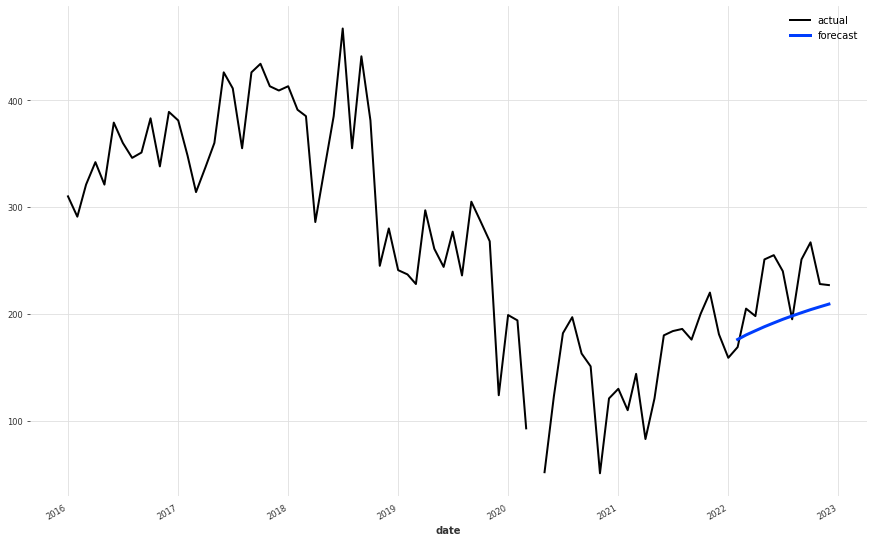

Score mse:  1642.6474853021975
Score mae:  33.79643330412075
Score dtw_metric for mae:  21.132428238133272


In [175]:
series = TimeSeries.from_dataframe(df_year_month, 'date', 'count', fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_aarima = AutoARIMA(start_p=1, max_p=4, start_q=3, max_q=9, max_order=2, d=0,max_d=2, out_of_sample_size=7, maxiter=100, alpha=0.0056)
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual')
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.show()

print('Score mse: ', mse(val, prediction_aarima))
print('Score mae: ', mae(val, prediction_aarima ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_aarima, metric=mae))

## VARIMA 

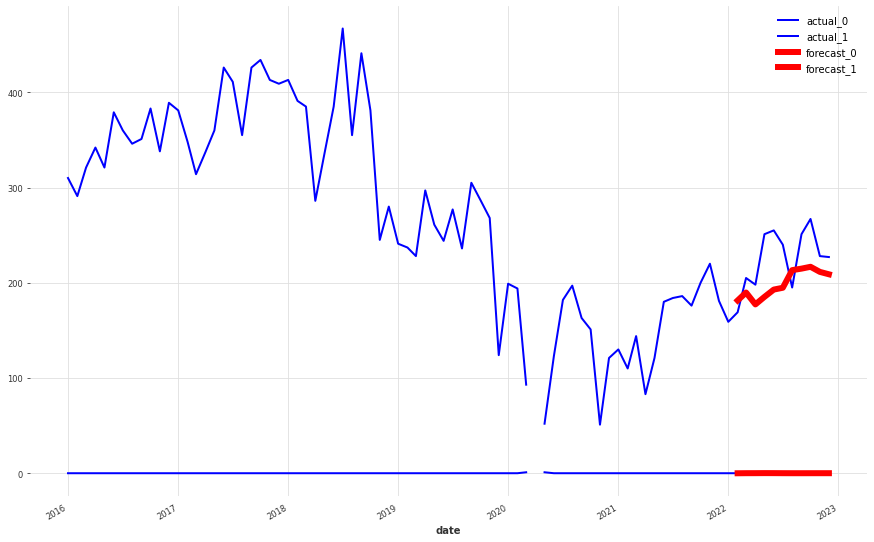

Score mse:  719.3203710320676
Score mae:  16.427288277835874
Score dtw_metric for mae:  22.296466401113513


In [109]:
series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols=['count','covid'], fill_missing_dates=True, freq="MS")
train, val = series.split_before(pd.Timestamp('20220110'))

model_varima = VARIMA(p=6, q=6, d=0, trend='c')
model_varima.fit(train)
prediction_varima = model_varima.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_varima.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_varima))
print('Score mae: ', mae(val, prediction_varima ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_varima, metric=mae))

## Linear regression with many features

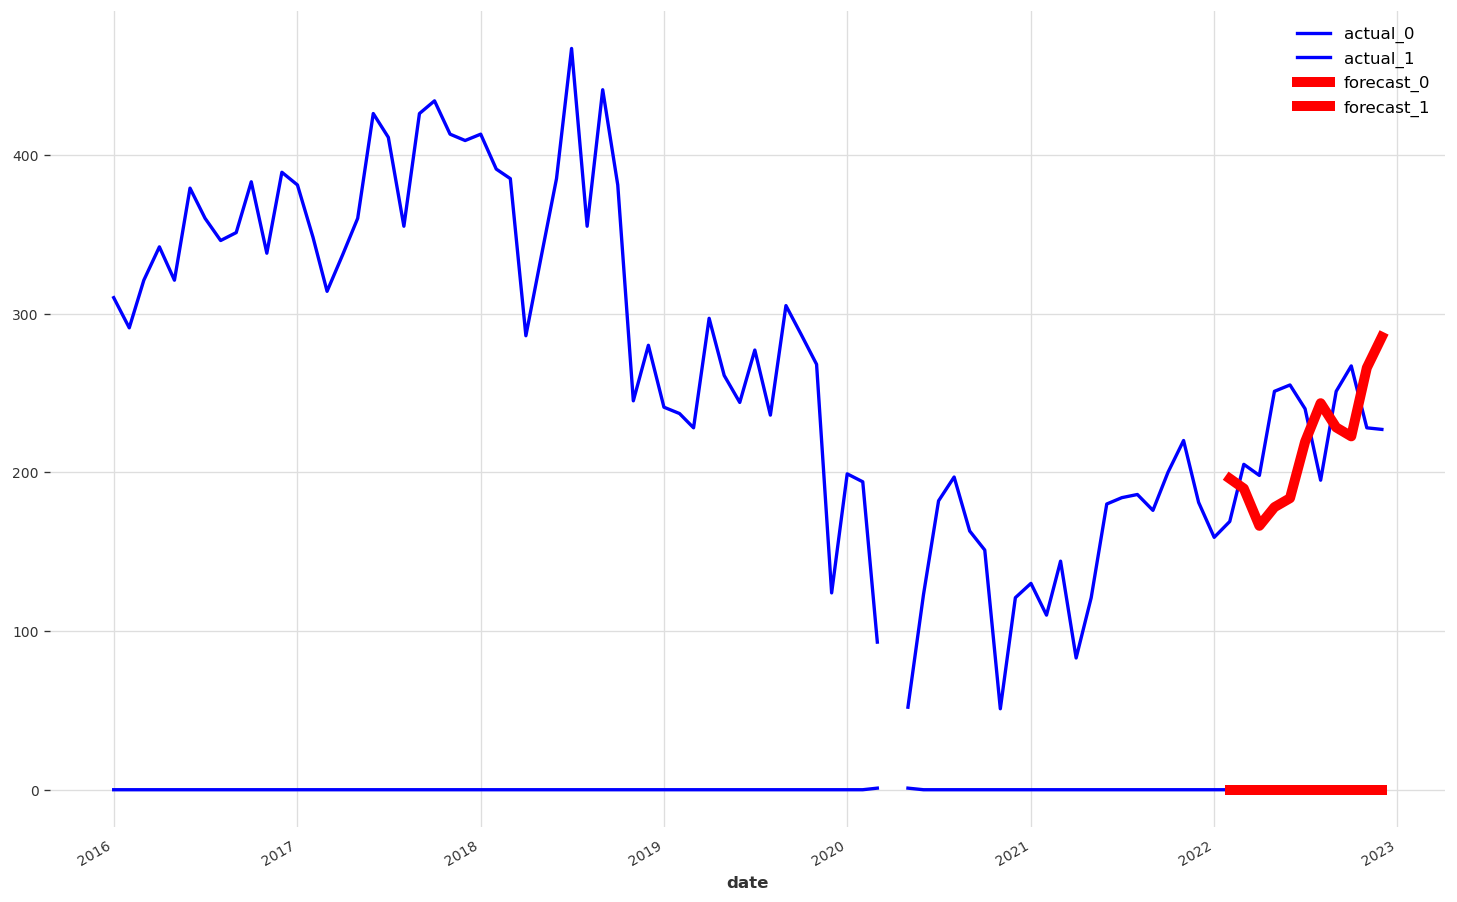

Score mse:  1021.9777041037687
Score mae:  20.493018039951558
Score dtw_metric for mae:  19.46021475639115


In [341]:
# Try with several columns 
# series = TimeSeries.from_times_and_values(df_year_month, columns=['date','count','covid'], times='date', values='count', fill_missing_dates=True, freq="MS")
# series = TimeSeries.from_group_dataframe(df_year_month, group_cols=['count','covid'], time_col='date', value_cols='count', fill_missing_dates=True, freq="MS")
# series = TimeSeries.from_series(pd_series=df_year_month[['date','count','covid']], freq="MS")

series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols=['count','covid'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_lr = LinearRegressionModel(lags=6, output_chunk_length=12)
model_lr.fit(train)
prediction_lr = model_lr.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_lr.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_lr))
print('Score mae: ', mae(val, prediction_lr ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_lr, metric=mae))

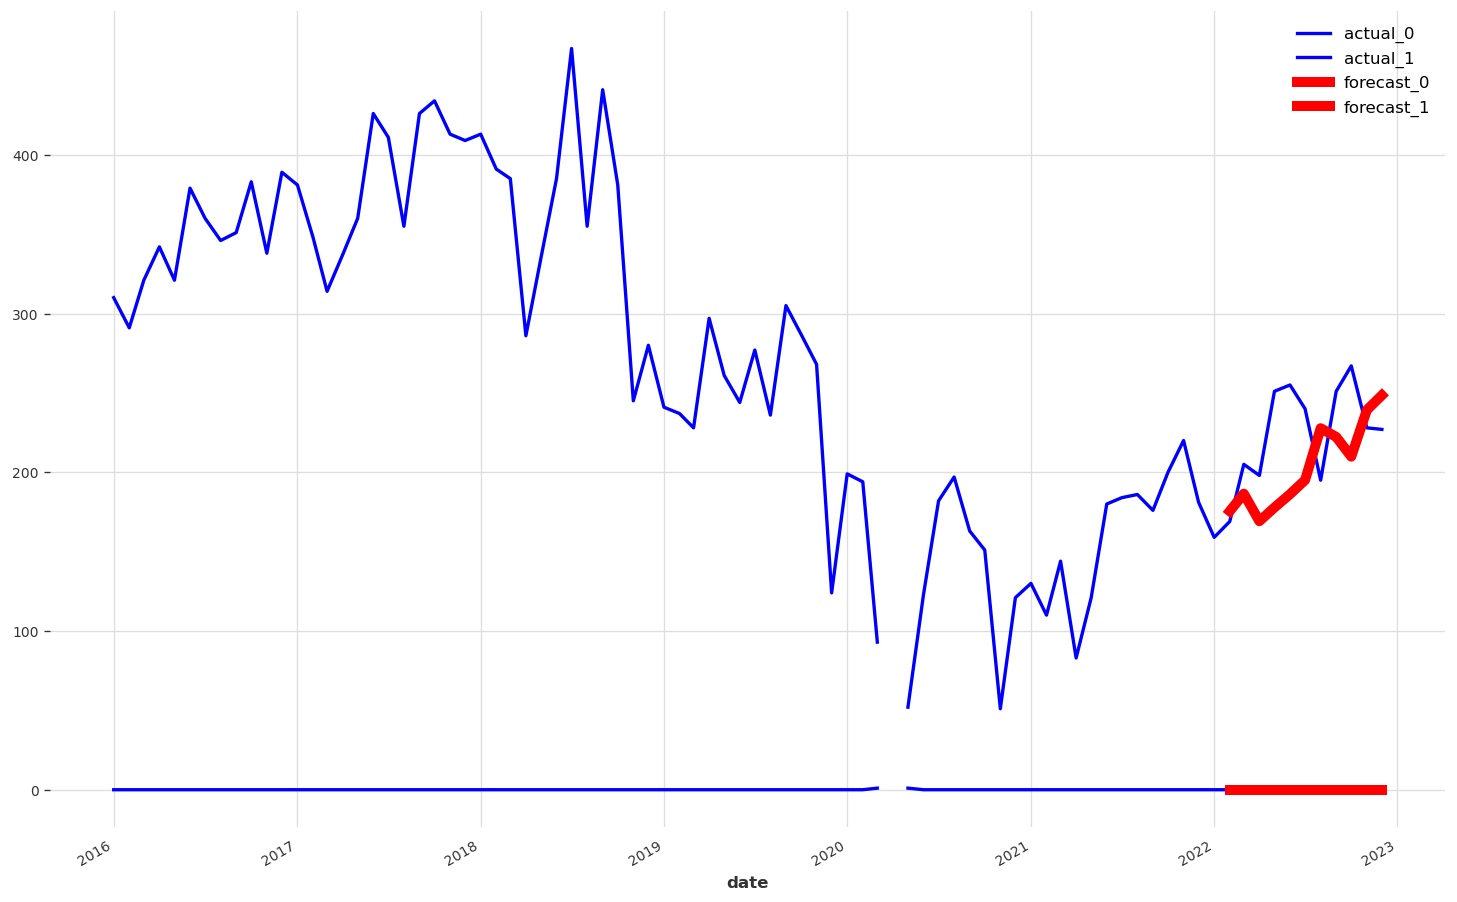

Score mse:  867.0791752027108
Score mae:  17.81936188374016
Score dtw_metric for mae:  15.009043498488618


In [342]:
from darts.models import AutoARIMA
from darts.models import ExponentialSmoothing
from darts.models.forecasting.linear_regression_model import LinearRegressionModel
from darts.models.forecasting.xgboost import XGBModel
from darts.metrics.metrics import mse, marre, mae, dtw_metric

series = TimeSeries.from_dataframe(df_year_month, 'date', ['count','covid'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_lr = LinearRegressionModel(lags=5, output_chunk_length=12)
model_lr.fit(train)
prediction_lr = model_lr.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_lr.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_lr))
print('Score mae: ', mae(val, prediction_lr ))

# print('Score marre: ', marre(val, prediction_lr ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_lr, metric=mae))

## Linear regression by year - month 

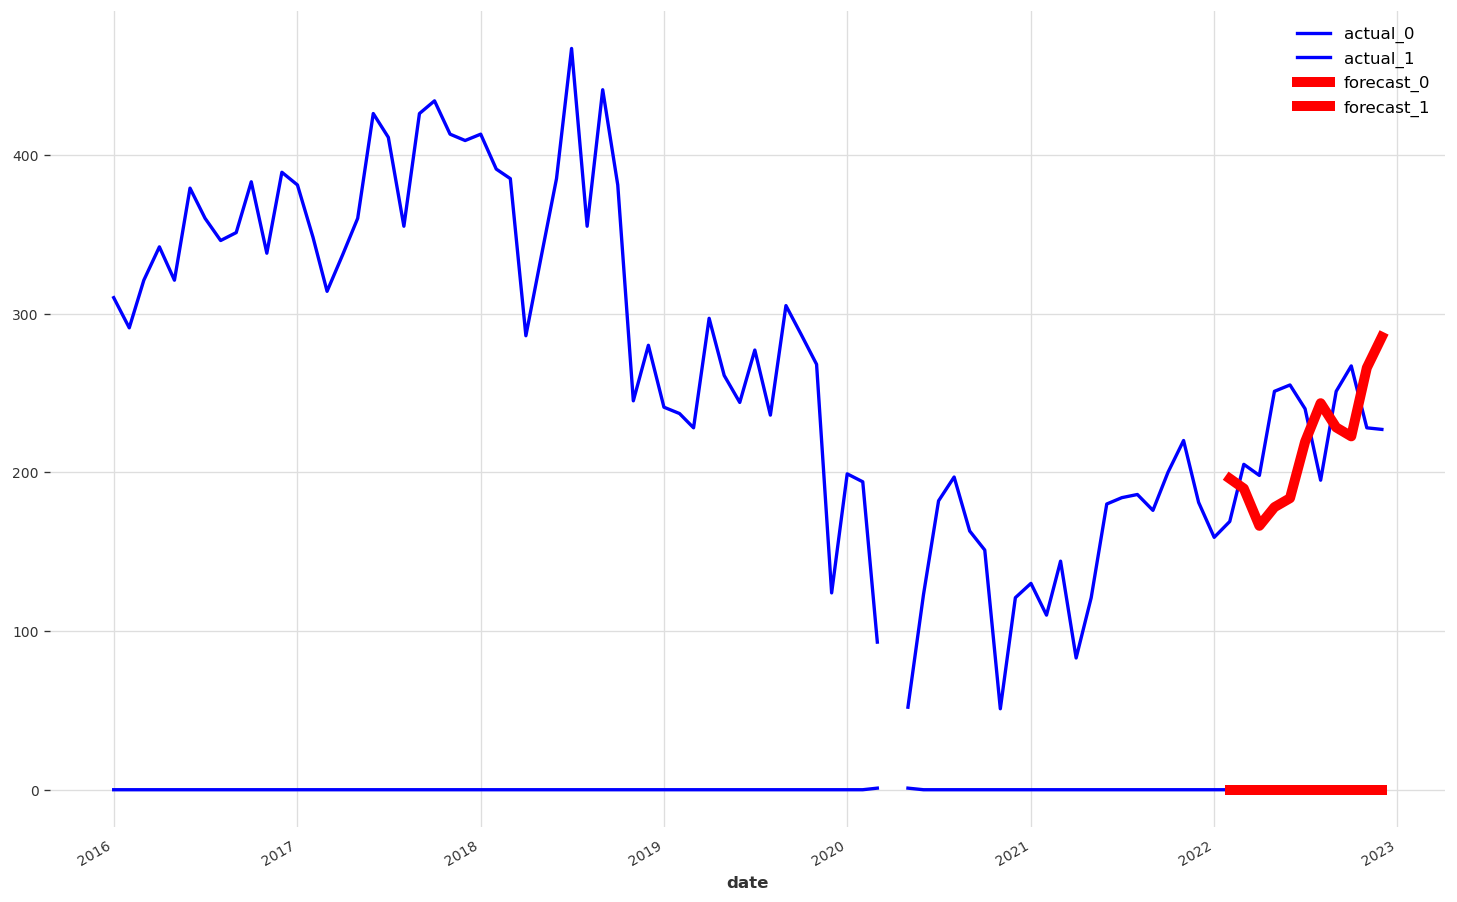

Score mse:  1021.9777041037687
Score mae:  20.493018039951558
Score dtw_metric for mae:  19.46021475639115


In [343]:
series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols=['count','covid'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_lr = LinearRegressionModel(lags=6, output_chunk_length=12)
model_lr.fit(train)
prediction_lr = model_lr.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_lr.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_lr))
print('Score mae: ', mae(val, prediction_lr ))
# print('Score mape: ', mape(val, prediction_lr ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_lr, metric=mae))

## LGBM by year month 

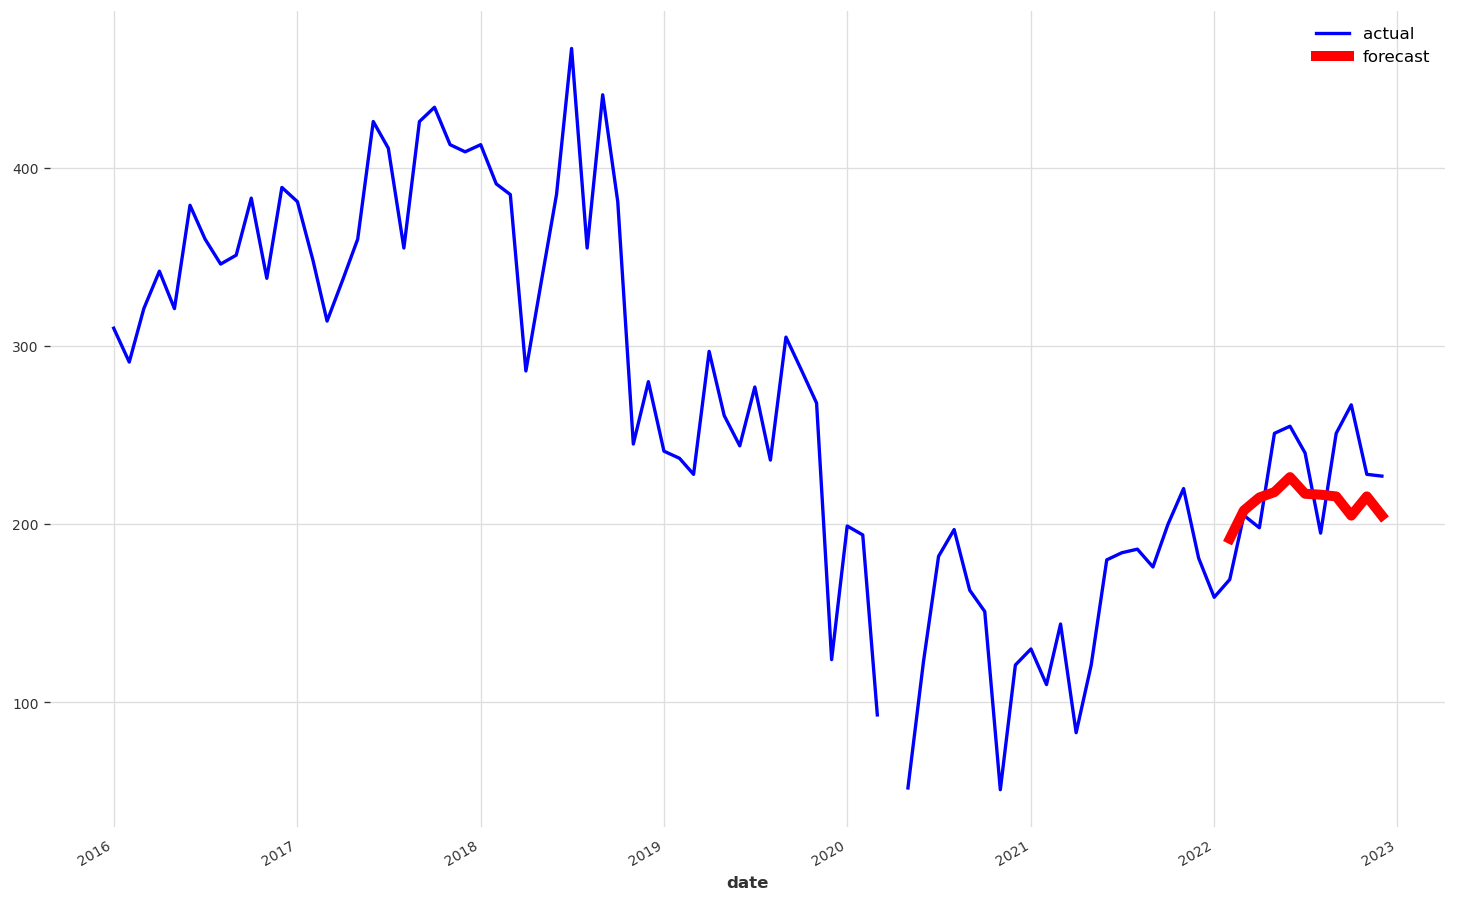

Score mse:  861.0748734564212
Score mae:  25.51664919231106
Score dtw_metric for mae:  25.51664919231106


In [344]:
series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols=['count'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_lgbm = LightGBMModel(lags=6, output_chunk_length=9, multi_models=True)
model_lgbm.fit(train)
prediction_lgbm = model_lgbm.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_lgbm.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_lgbm))
print('Score mae: ', mae(val, prediction_lgbm ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_lgbm, metric=mae))

## Prophet 

In [345]:
# Need to change column names to match Prophet params 
df_year_month_prophet = df_year_month.rename(columns={'date':'ds','count':'y'})
df_year_month_prophet

,ds,y,covid
0,2016-01,310,False
1,2016-02,291,False
2,2016-03,321,False
3,2016-04,342,False
4,2016-05,321,False
...,...,...,...
78,2022-08,195,False
79,2022-09,251,False
80,2022-10,267,False
81,2022-11,228,False


17:48:42 - cmdstanpy - INFO - Chain [1] start processing
17:48:42 - cmdstanpy - INFO - Chain [1] done processing


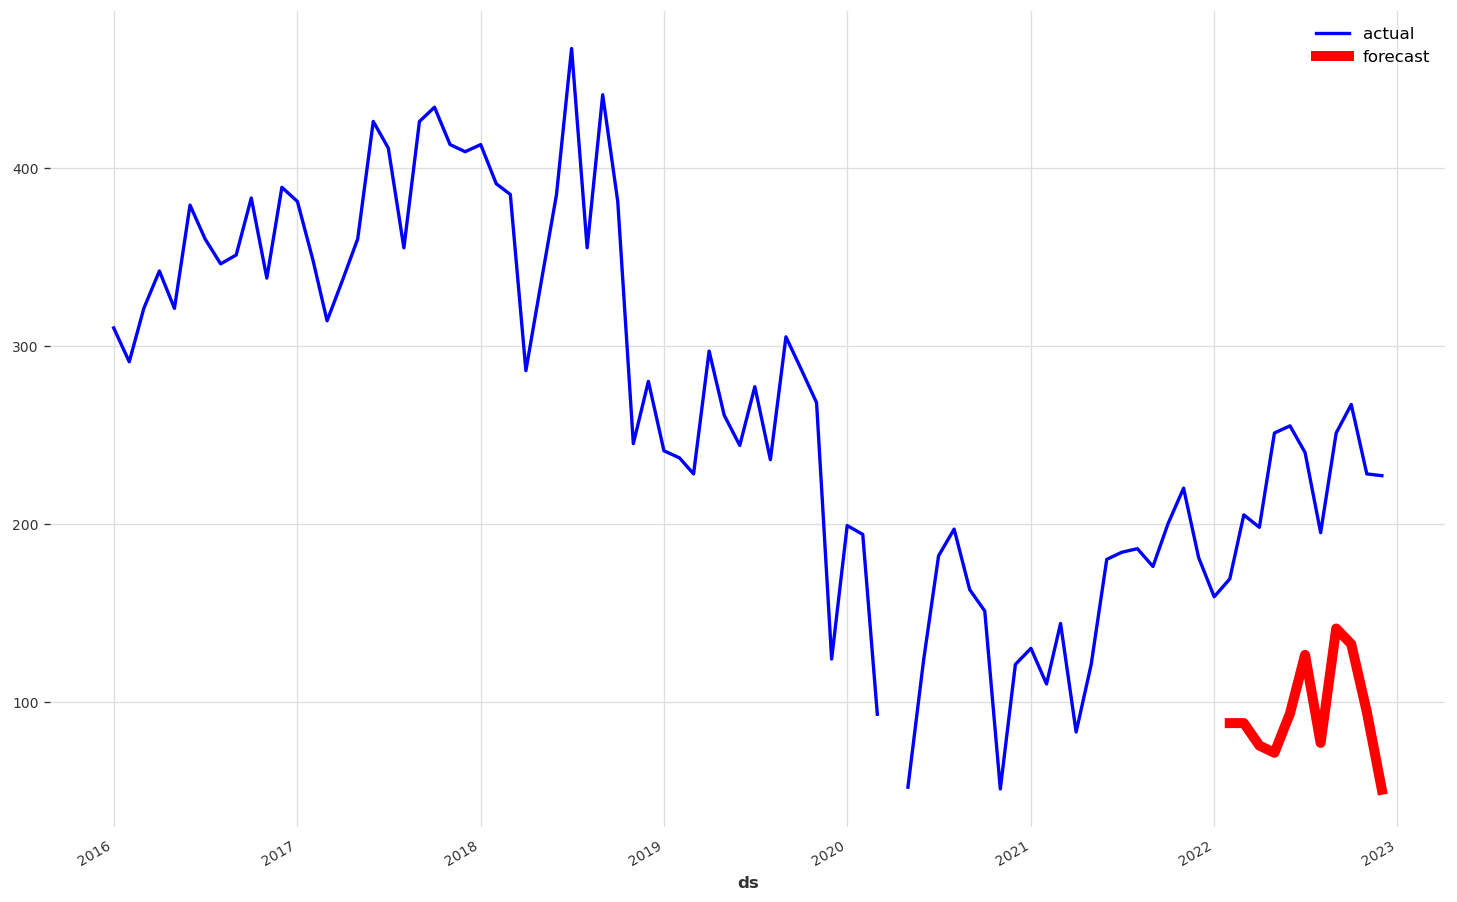

Score mse:  18152.200590423807
Score mae:  131.6375869664933
Score dtw_metric for mae:  131.6375869664933


In [346]:
series = TimeSeries.from_dataframe(df_year_month_prophet, 'ds', ['y'], fill_missing_dates=True, freq="MS")
train, val = series.split_before(pd.Timestamp('20220110'))

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_prophet.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_prophet))
print('Score mae: ', mae(val, prediction_prophet ))
# print('Score marre: ', marre(val, prediction_prophet ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_prophet, metric=mae))

## XGBModel by year - month 

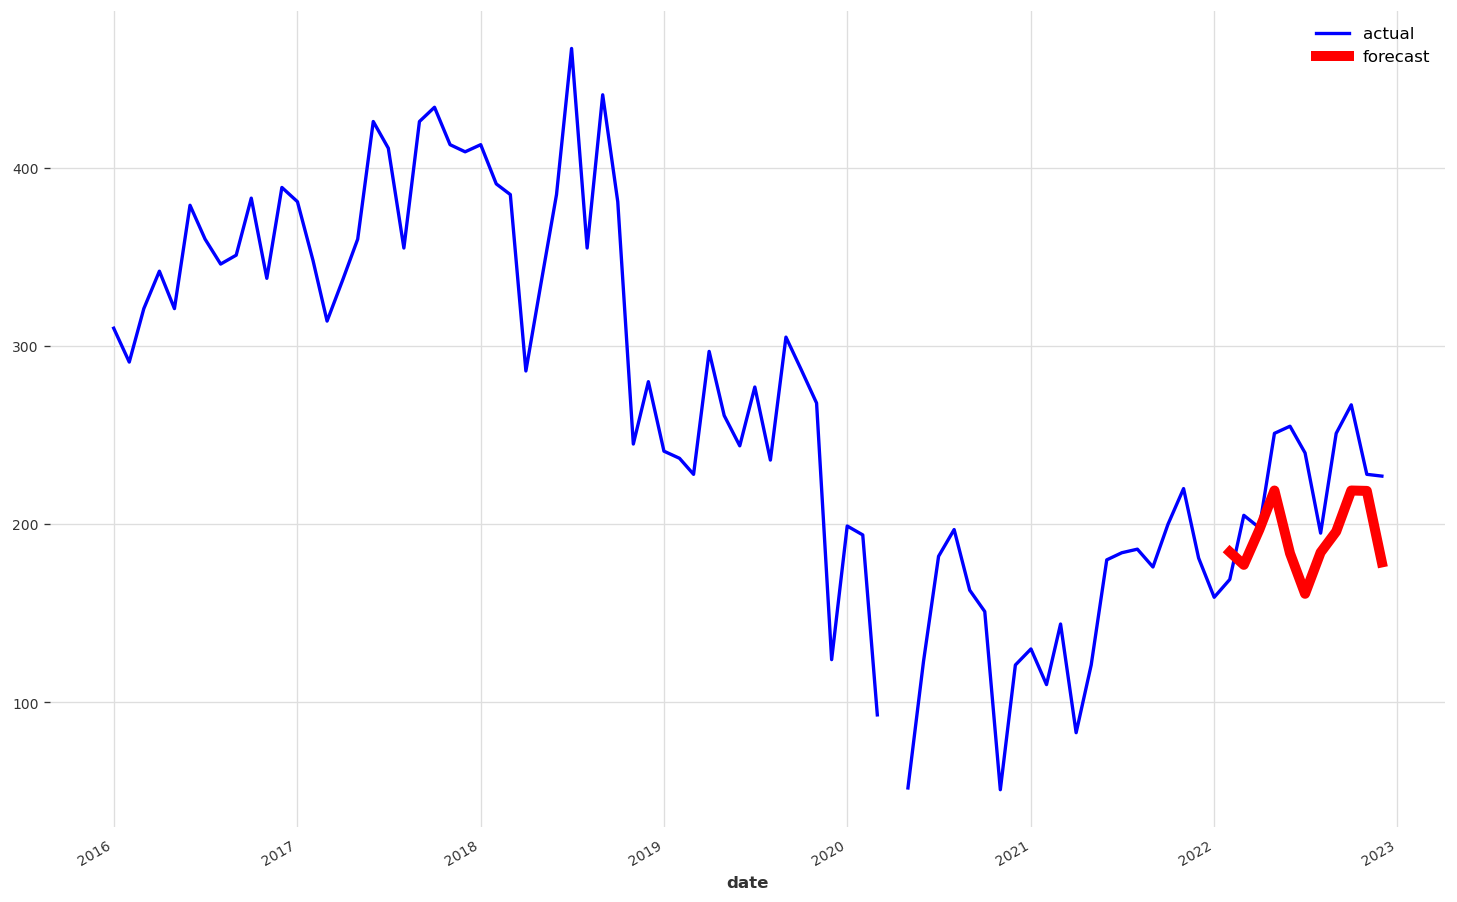

Score mse:  1933.6825446585108
Score mae:  36.217676336115055
Score dtw_metric for mae:  21.12320556640625


In [347]:
series = TimeSeries.from_dataframe(df_year_month, 'date', ['count'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_xgb = XGBModel(lags=14, output_chunk_length=6, booster='dart', max_depth=9, gamma=6, reg_alpha=0, reg_lambda=8, refresh_leaf=1)

model_xgb.fit(train)

prediction_xgb = model_xgb.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_xgb.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_xgb))
print('Score mae: ', mae(val, prediction_xgb ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_xgb, metric=mae))

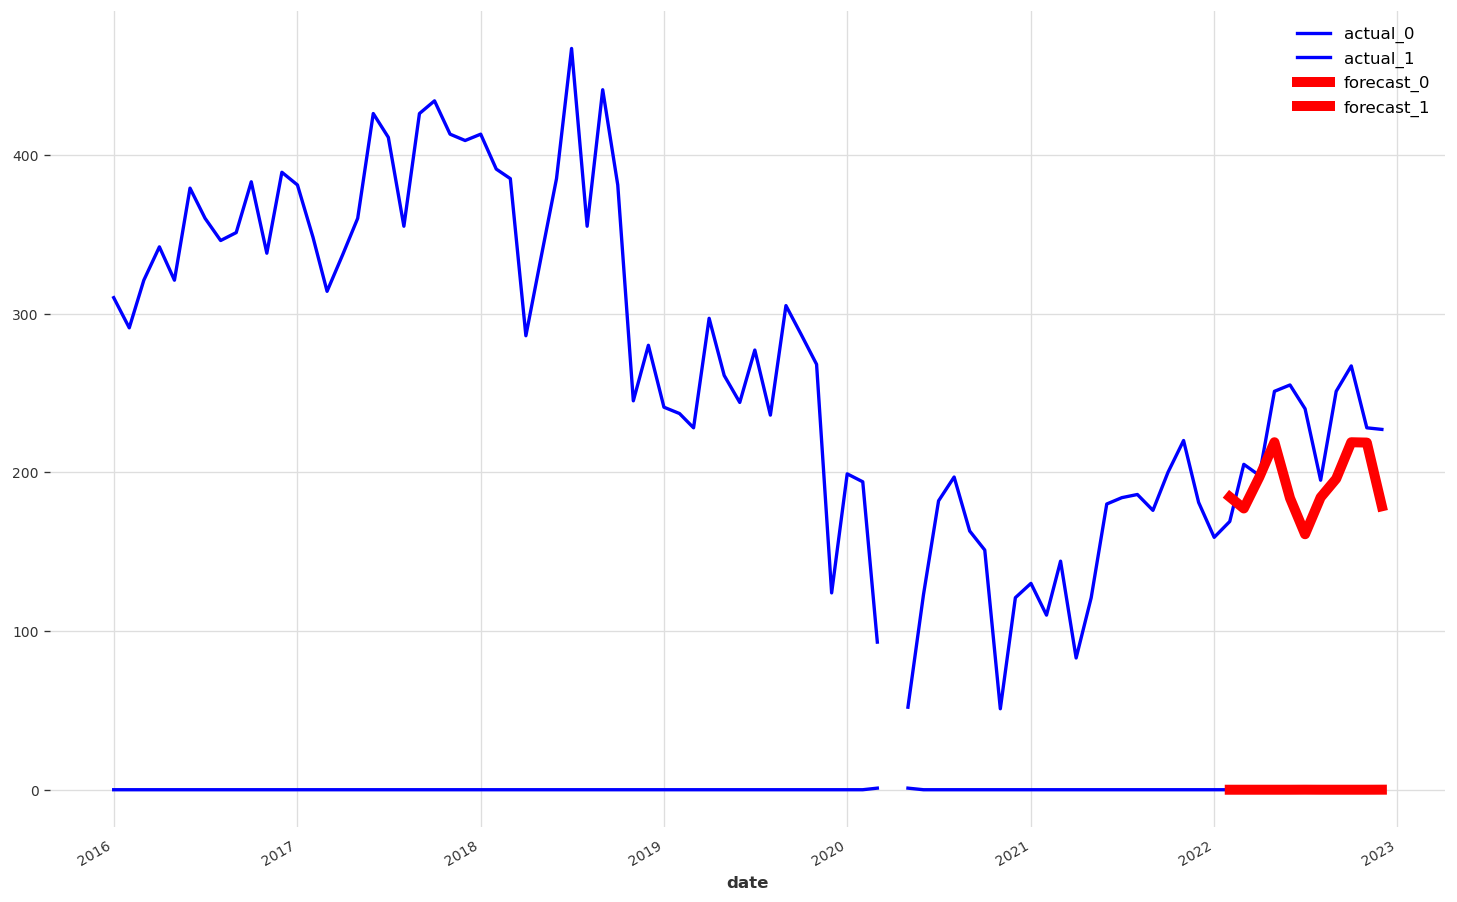

Score mse:  966.8413509700093
Score mae:  18.111511959270995
Score dtw_metric for mae:  21.12712712685267


In [348]:
series = TimeSeries.from_dataframe(df_year_month, 'date', ['count','covid'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

# model_xgb = XGBModel(lags=12, output_chunk_length=3)
model_xgb = XGBModel(lags=14, output_chunk_length=6, booster='dart', max_depth=9, gamma=6, reg_alpha=0, reg_lambda=8, refresh_leaf=1)
model_xgb.fit(train)
prediction_xgb = model_xgb.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_xgb.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_xgb))
print('Score mae: ', mae(val, prediction_xgb ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_xgb, metric=mae))

## RandomForest

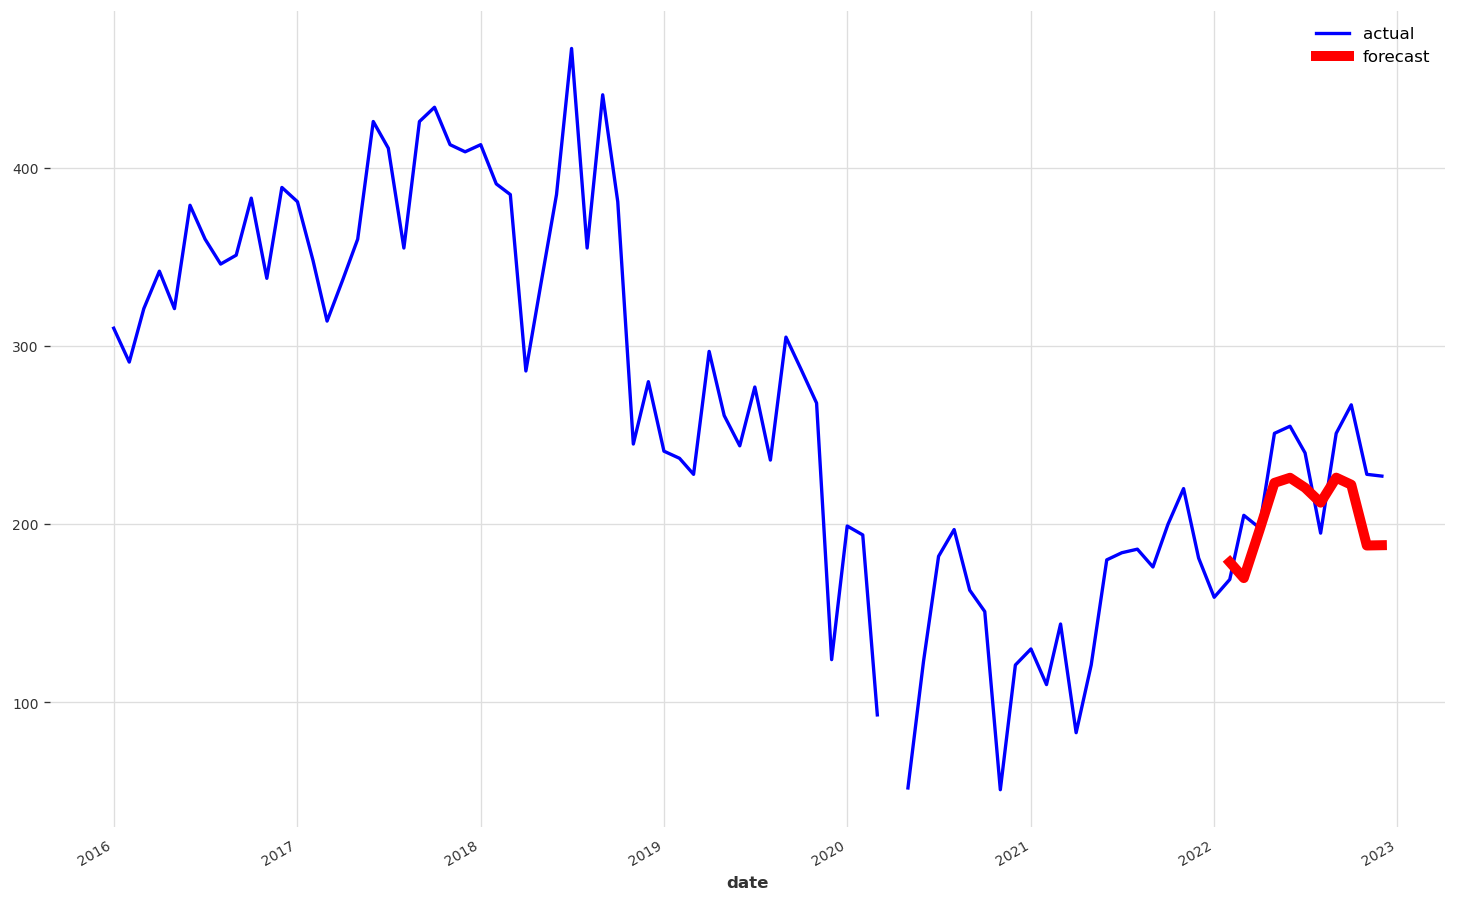

Score mse:  849.8320230365439
Score mae:  26.202097037161987
Score dtw_metric for mae:  21.855430581323446


In [349]:
series = TimeSeries.from_dataframe(df_year_month, 'date', ['count'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_rf = RandomForest(lags=10, output_chunk_length=10, n_estimators=35, max_depth=2, multi_models=True)

model_rf.fit(train)

prediction_rf = model_rf.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_rf.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_rf))
print('Score mae: ', mae(val, prediction_rf ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_rf, metric=mae))

## CatBoost

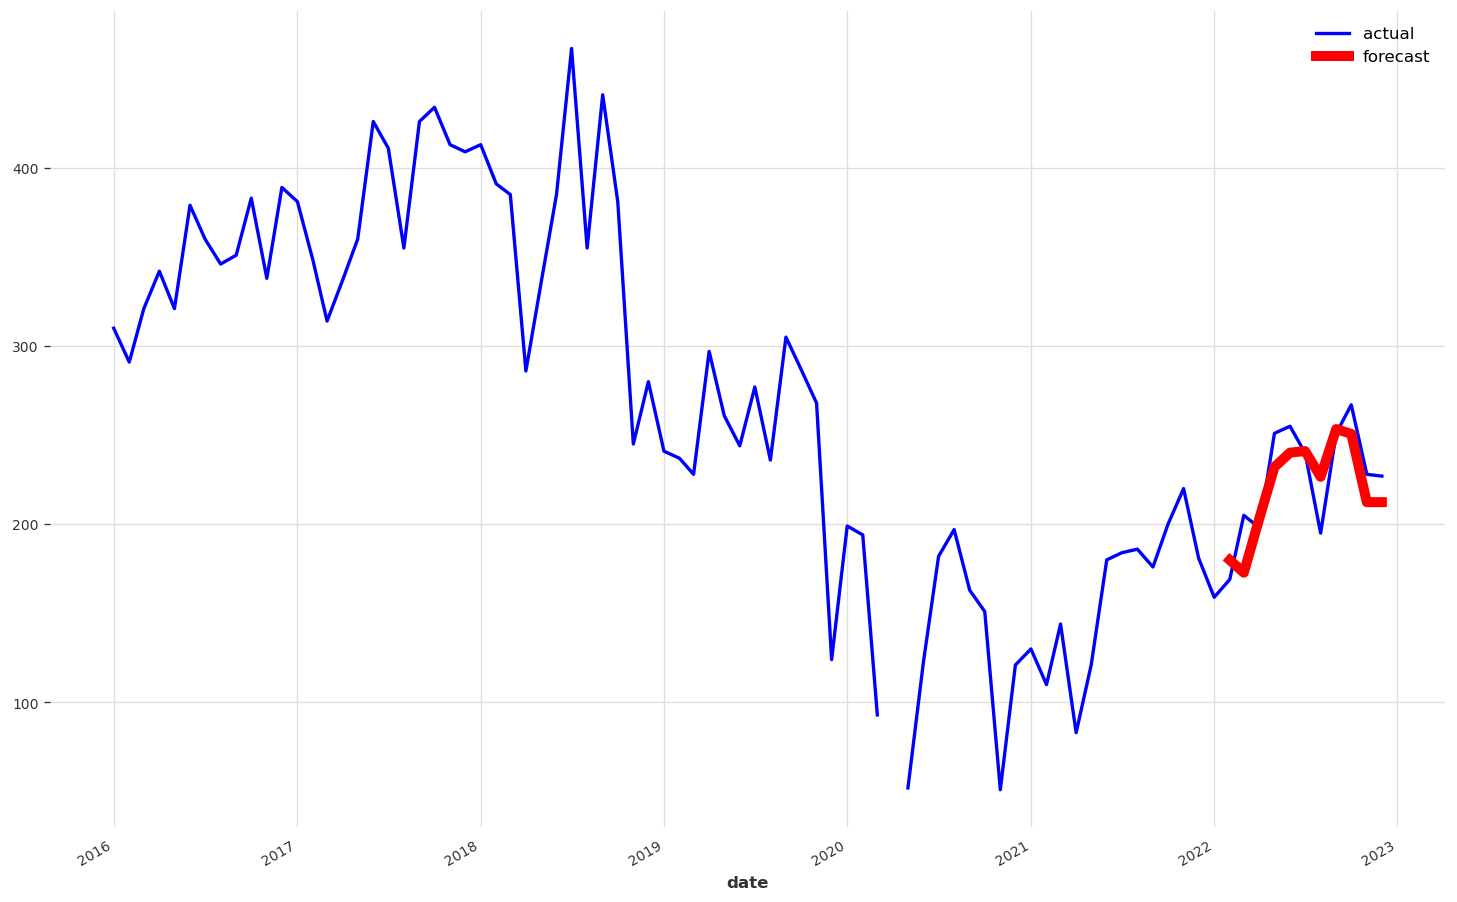

Score mse:  317.3070446448173
Score mae:  14.887920476574022
Score mape:  6.836392313977391
Score dtw_metric for mae:  11.416890017464306


In [350]:
series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols=['count'], fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_catboost = CatBoostModel(lags=10, output_chunk_length=10, learning_rate=4e-3, l2_leaf_reg=4, depth=1)
model_catboost.fit(train)
prediction_catboost = model_catboost.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_catboost.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_catboost))
print('Score mae: ', mae(val, prediction_catboost ))
print('Score mape: ', mape(val, prediction_catboost ))
print('Score dtw_metric for mae: ', dtw_metric(val, prediction_catboost, metric=mae))



## Réseaux de neuronnes: RNNModel - LSTM - GRU - TFT (Temportal Fusion Transformer)

In [1]:
# Erreur pour la suite: Les resultats des prédictions de réseaux de neuronnes Darts donnent des nan. A debuger

### RNNModel

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.006     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

len of val: 11


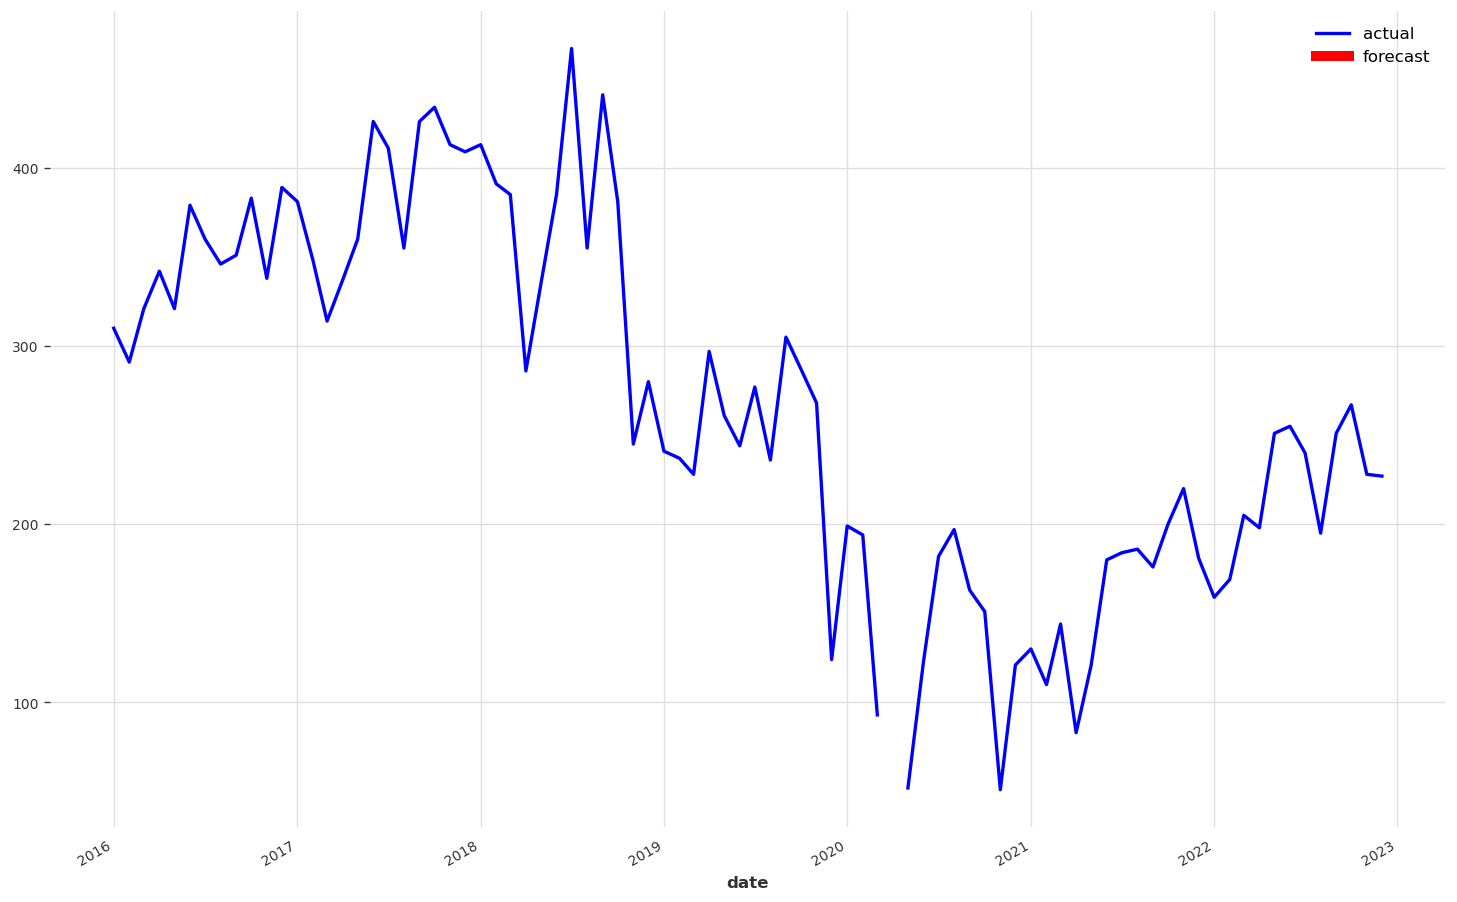

<TimeSeries (DataArray) (date: 11, component: 1, sample: 1)>
array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]])
Coordinates:
  * date       (date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-11-01
  * component  (component) object 'count'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [352]:
series = TimeSeries.from_dataframe(df_year_month, 'date', 'count', fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_rnn = RNNModel(input_chunk_length=2, model='RNN', n_epochs=100, batch_size=32, optimizer_kwargs={'lr': 1e-4}, dropout=0.2, n_rnn_layers=1)
model_rnn.fit([train])
prediction_rnn = model_rnn.predict(n=len(val), series=val)
print('len of val:', len(val))
plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_rnn.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
# print('Score mse: ', mse(val, prediction_rnn))
# print('Score mae: ', mae(val, prediction_rnn ))
# print('Score dtw_metric for mae: ', dtw_metric(val, prediction_rnn, metric=mae))
print(prediction_rnn)

### LSTM

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | V             | Linear           | 26    
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.023     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

len of val: 11


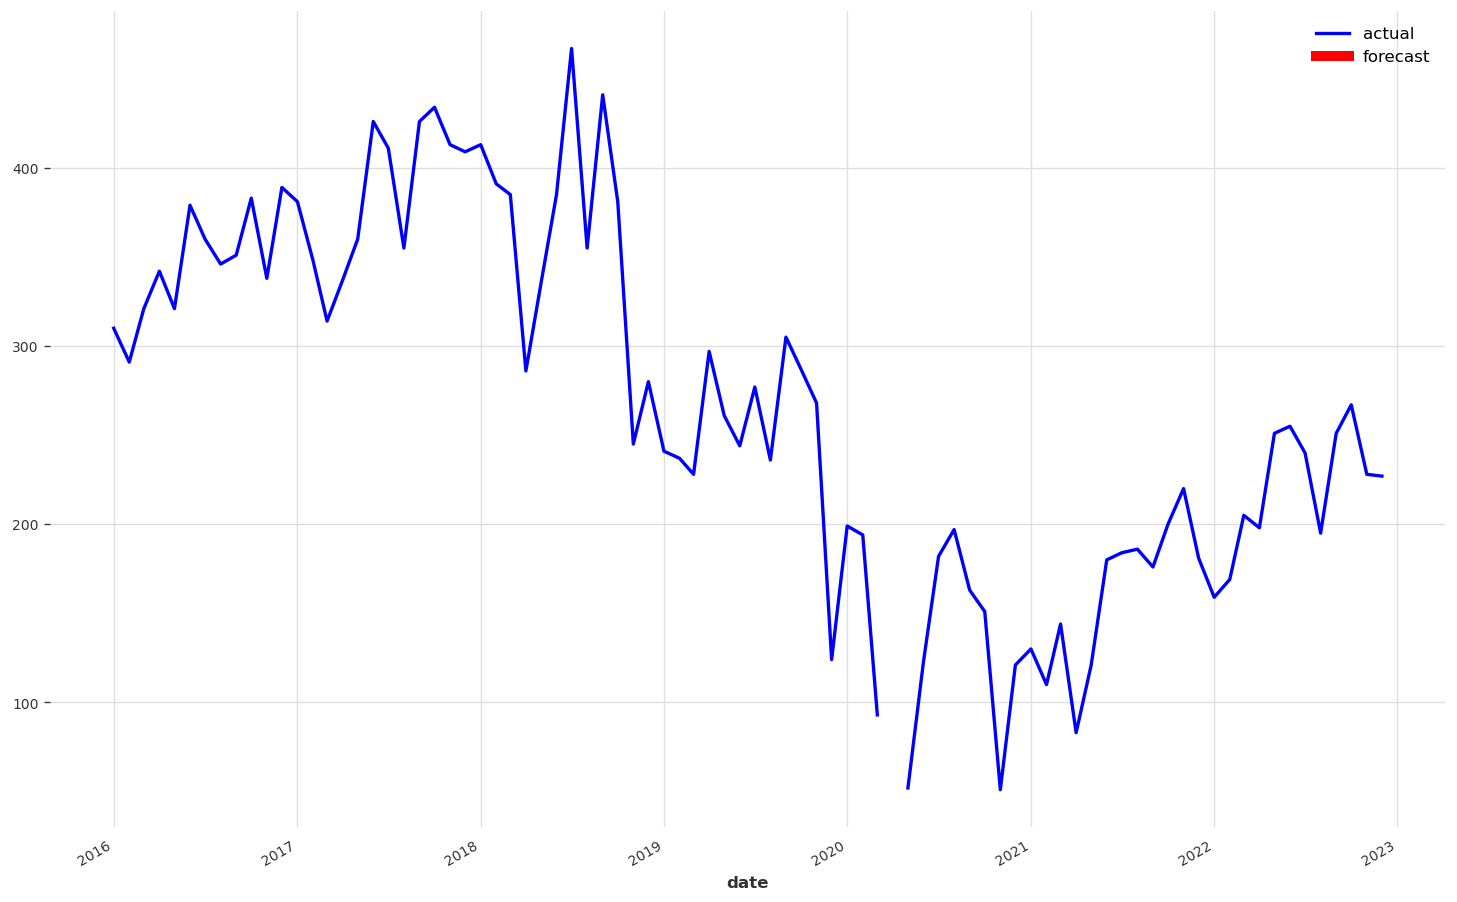

<TimeSeries (DataArray) (date: 11, component: 1, sample: 1)>
array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]])
Coordinates:
  * date       (date) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-11-01
  * component  (component) object 'count'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [353]:
from darts.models import RNNModel

# Resultat de la prédiction donne des nan...

series = TimeSeries.from_dataframe(df_year_month, 'date', 'count', fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model_lstm = RNNModel(input_chunk_length=2, model='LSTM', n_epochs=100, batch_size=32, optimizer_kwargs={'lr': 1e-4}, dropout=0.2, n_rnn_layers=1)
model_lstm.fit([train])
prediction_lstm = model_lstm.predict(n=len(val), series=val)
print('len of val:', len(val))
plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_lstm.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
# print('Score mse: ', mse(val, prediction_lstm))
# print('Score mae: ', mae(val, prediction_lstm ))
# print('Score dtw_metric for mae: ', dtw_metric(val, prediction_lstm, metric=mae))
print(prediction_lstm)

### TFT (Temportal Fusion Transformer)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0     
4  | encoder_vsn                       | _VariableSelectionNetwork        | 1.2 K 
5  | decoder_vsn                       | _VariableSelectionNetwork        | 528   
6  | static_context_grn                | _GatedResidualNetwork            | 1.1 K 
7  | static_context_hidden_encoder_grn | _GatedResidualNetwork            | 1.1 K 
8  | static_cont

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

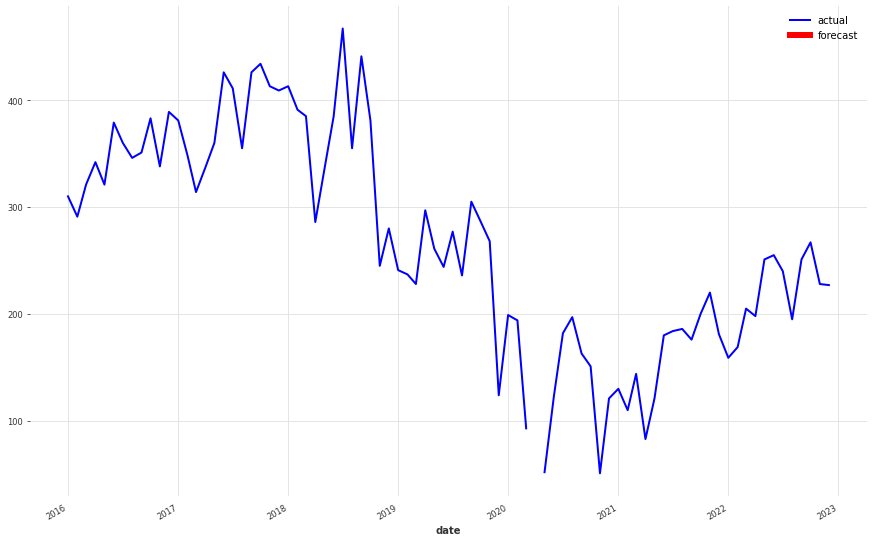

Score mse:  nan
Score mae:  nan


In [111]:
series = TimeSeries.from_dataframe(df_year_month, time_col='date', value_cols='count', fill_missing_dates=True, freq="MS")
train, val = series.split_before(pd.Timestamp('20220110'))

model_tft = TFTModel(input_chunk_length=2, output_chunk_length=9, add_relative_index=True, lstm_layers=3)
model_tft.fit(train)
prediction_tft = model_tft.predict(len(val))

plt.figure(figsize=(15, 9))
series.plot(label='actual', color='blue')
prediction_tft.plot(label='forecast', lw=6, color='red')
plt.legend()
plt.show()
print('Score mse: ', mse(val, prediction_tft))
print('Score mae: ', mae(val, prediction_tft ))
# print('Score dtw_metric for mae: ', dtw_metric(val, prediction_tft, metric=mae))

## ExponentialSmoothing by day 

In [166]:
df_test_day = df.groupby(df.date.dt.date).sum()['count'].reset_index()
df_test_day.date = df_test_day.date.apply(pd.to_datetime)
df_test_day

,date,count
0,2016-01-01,1
1,2016-01-02,8
2,2016-01-03,8
3,2016-01-04,12
4,2016-01-05,4
...,...,...
2442,2022-12-27,2
2443,2022-12-28,4
2444,2022-12-29,13
2445,2022-12-30,10


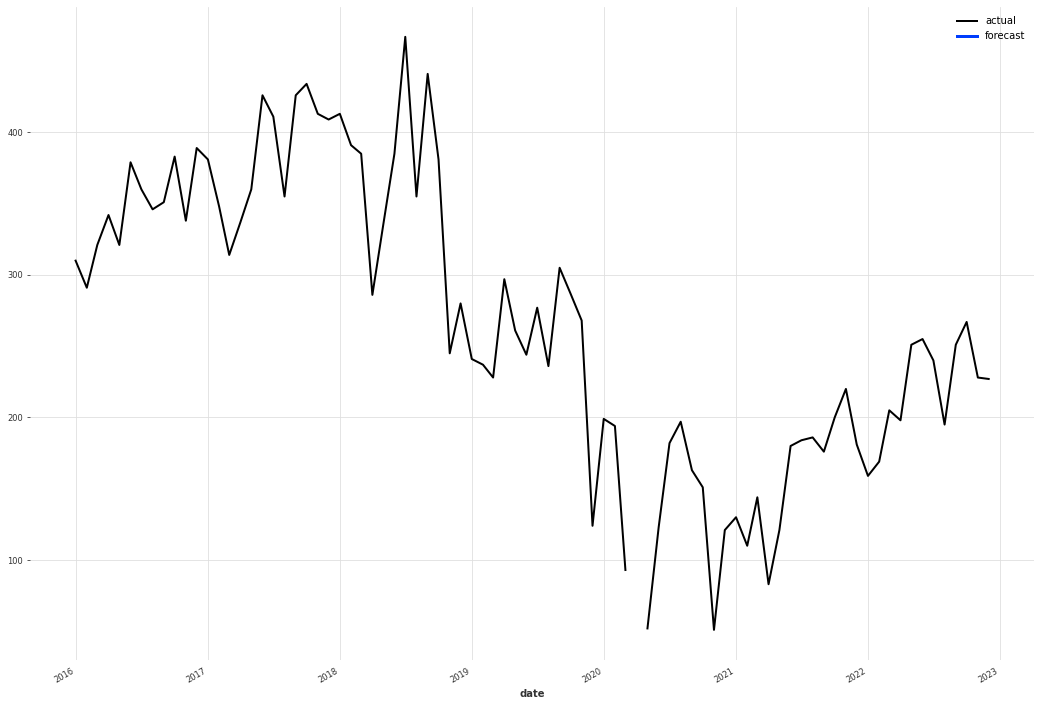

Score mse:  nan
Score mae:  nan


In [165]:
# series = TimeSeries.from_dataframe(df_test_day, 'date', 'count', fill_missing_dates=True, freq="D")
series = TimeSeries.from_dataframe(df_year_month, 'date', 'count', fill_missing_dates=True, freq="MS")

train, val = series.split_before(pd.Timestamp('20220110'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

plt.figure(figsize=(18, 12))
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.show()

print('Score mse: ', mse(val, prediction))
print('Score mae: ', mae(val, prediction ))
# print('Score marre: ', marre(val, prediction ))
# print('Score dtw_metric for mae: ', dtw_metric(val, prediction, metric=mae))

# Statistiques, explorations diverses 

In [358]:
# Voir pour récupéré la bonne version de pandas ? Pour retrouver l'attribut _assert_univariate et acceder aux fonctions ci dessous

from darts.utils.statistics import check_seasonality, remove_seasonality, plot_acf, remove_trend

seasonality = check_seasonality(df_test_day, 'count')

if seasonality:
  print('The time series data in the count column is seasonal for df groupby day.')
else:
  print('The time series data in the count column is not seasonal for df groupby day.')

AttributeError: 'DataFrame' object has no attribute '_assert_univariate'

In [ ]:
# plot_acf(df_test_day)
plot_acf(df_test_month, m=12)

AttributeError: 'DataFrame' object has no attribute '_assert_univariate'

In [ ]:
remove_seasonality(df_test_day)